In [2]:
%matplotlib inline
from scipy.stats import t

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
heights = pd.read_csv("Galton.txt",sep="\t")
print(heights.head(5))

  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


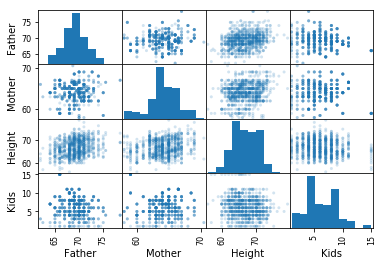

In [3]:
ax=pd.plotting.scatter_matrix(heights, alpha=0.2)

In [4]:
def pair(data, labels=None):
    """ Generate something similar to R `pair` """

    nVariables = data.shape[1]
    if labels is None:
        labels = list(heights)
    fig = plt.figure(figsize=(8, 8),dpi=100)
    for i in range(nVariables):
        for j in range(nVariables):
            nSub = i * nVariables + j + 1
            ax = fig.add_subplot(nVariables, nVariables, nSub)
            if i == j:
                ax.hist(data.iloc[:,i])
                ax.set_title(labels[i])
            else:
                ax.plot(data.iloc[:,i], data.iloc[:,j], '.')

    return fig


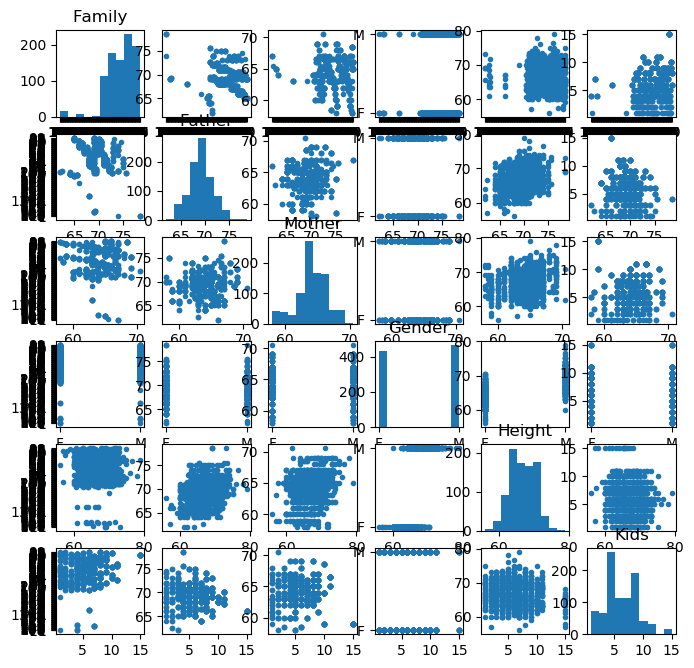

In [5]:
fig=pair(heights)
plt.show()

In [10]:
import statsmodels.api as sm
model = sm.OLS.from_formula(formula='Height~Father+Mother+Gender+Kids',data=heights)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     398.1
Date:                Fri, 09 Feb 2018   Prob (F-statistic):          9.09e-197
Time:                        16:37:15   Log-Likelihood:                -1960.1
No. Observations:                 898   AIC:                             3930.
Df Residuals:                     893   BIC:                             3954.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.1877      2.794      5.794      

In [7]:
model = sm.OLS.from_formula(formula='Height~Father+Mother+Gender',data=heights)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Fri, 09 Feb 2018   Prob (F-statistic):          1.33e-197
Time:                        16:33:28   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.3448      2.747      5.586      

In [8]:
# each extra inch taller a father is is correlated with 0.4 inch extra
#   height in the child
# each extra inch taller a mother is is correlated with 0.3 inch extra
#   height in the child
# a male child is on average 5.2 inches taller than a female child
# 95% posterior interval for the the difference in height by gender
print(5.226-0.144*t.ppf(0.975,894))
print(5.226+0.144*t.ppf(0.975,894))

4.943382566373184
5.508617433626816


In [9]:
predictions1 =results.get_prediction({"Father":[68],"Mother":[64],"Gender":["M"]})
print(predictions1.summary_frame(alpha=0.05))
predictions2 =results.get_prediction({"Father":[68],"Mother":[64],"Gender":["F"]})
print(predictions2.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  68.752906  0.105566      68.545719      68.960092     64.519707   

   obs_ci_upper  
0     72.986105  
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  63.526954  0.110291      63.310495      63.743413     59.293291   

   obs_ci_upper  
0     67.760617  
